In [9]:
import analysis
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal as sg

%matplotlib inline

In [10]:
data_path = '/media/labrat/395Mount/FSL_work/SH/SH_031_05052017_EDITS.txt'

In [11]:
meants_path = '/media/labrat/395Mount/FSL_work/SH_all/SH031/BOLD/meants.txt'

In [12]:
data = pd.read_csv(data_path, sep='\t|,', names=['Time', 'O2', 'CO2'],
                 usecols=['Time', 'O2', 'CO2'], index_col=False)[['Time', 'O2', 'CO2']]
filtered_O2 = analysis.fourier_filter(data.Time, data.O2, 3,50,1.5)
filtered_CO2 = analysis.fourier_filter(data.Time, data.CO2, 3,50,1.5)

/home/labrat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [13]:
 meants = np.loadtxt(meants_path,delimiter='\n')
print(len(meants))

OSError: /media/labrat/395Mount/FSL_work/SH_all/SH031/BOLD/meants.txt not found.

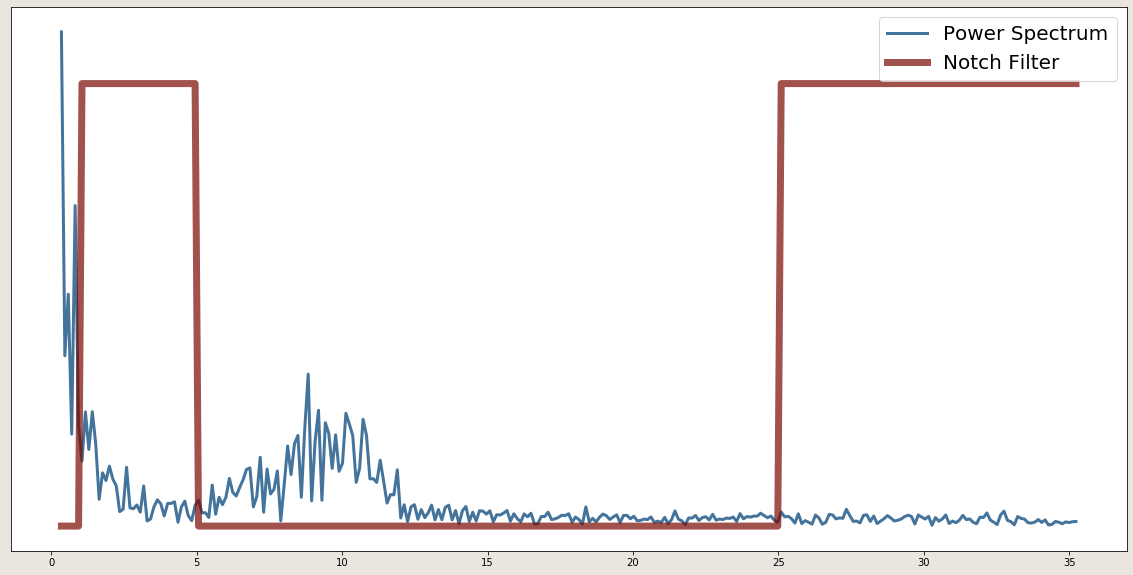

In [14]:
f,_,displayable_O2 = analysis.fourier_trans(data.Time[1], data.O2)

notch = []
for freq in f[3:300]:
    if(freq < 1 or (freq >= 5 and freq <= 25)):
        notch.append(0)
    else:
        notch.append(10)
    

plt.figure(figsize=(20,10), facecolor=(235/256,231/256,224/256,1))
plt.yticks([])
plt.plot(f[3:300], displayable_O2[3:300], linewidth = 3, label = "Power Spectrum", color=(68/256,116/256,157/256,1))
plt.plot(f[3:300], notch, linewidth = 7, label = "Notch Filter", color=(121/256,8/256,0/256,.7))
plt.legend(prop={'size': 20})
plt.savefig("example_ffA.png")


theme_background = (235/256,231/256,224/256,1)
theme_blue = (68/256,116/256,157/256,1)
theme_red = (121/256,8/256,0/256,1)

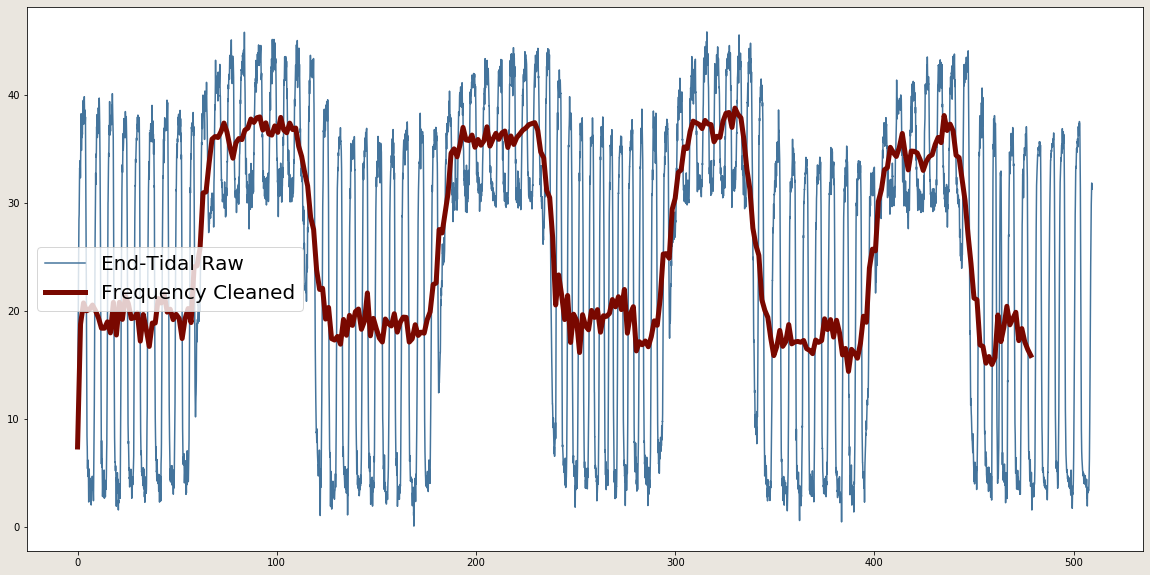

In [18]:
plt.figure(figsize=(20,10), facecolor=theme_background)
plt.plot(data.Time*60, data.CO2, color = theme_blue, label='End-Tidal Raw')
# print(data.Time)
time = np.arange(0,480,1.5)
plt.plot(time, filtered_CO2, color=theme_red, linewidth = 5, label='Frequency Cleaned')
# plt.plot(np.linspace(0,data.Time[len(data.Time)-1], 320),np.loadtxt('/media/labrat/395Mount/replicate_attempt1/SH_024_03292017_EDITS_CO2.contrast'), linewidth = 5)
plt.legend(prop={'size': 20})
plt.savefig("filtered.png")
plt.show()


In [ ]:
np.savetxt("/media/labrat/395Mount/FSL_work/Pass/O2.contrast", filtered_O2, delimiter='\n')

np.savetxt("/media/labrat/395Mount/FSL_work/Pass/CO2.contrast", filtered_CO2, delimiter='\n')

In [ ]:
print(filtered_CO2)

In [6]:
plt.figure(figsize=(20,10))
plt.plot((meants[3:]-350)*10)
plt.plot(filtered_CO2[:len(meants[3:])], color='red')
plt.plot(filtered_O2[:len(meants[3:])], color='green')

NameError: name 'meants' is not defined

<Figure size 1440x720 with 0 Axes>

   ID  LOW  HIGH  cLOW  cHIGH
0  30  3.1  13.7   2.3   15.7
1  31  3.1  15.0   2.3   19.3
2  33  3.1  16.7   2.3   15.9
3  42  3.1  14.9   2.3   12.7
4  26  3.1  14.9   2.3   21.1
5  27  3.1  17.3   2.3   22.2
6  41  3.1  12.6   2.3   17.2
7  52  3.1  14.9   2.3   12.3
8  22  3.1  18.8   2.3   16.0


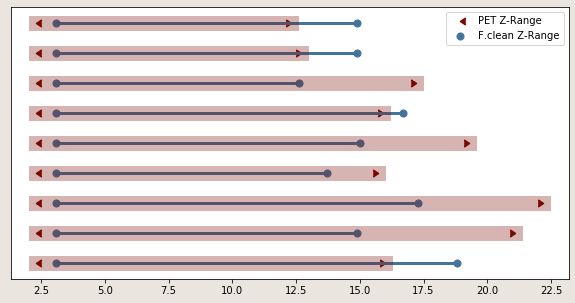

In [19]:
import matplotlib.lines as mlines

# Import Data
df = pd.read_csv("/media/labrat/395Mount/Repos/Project-Chocolate/data.csv", names=['ID','LOW', 'HIGH', 'cLOW', 'cHIGH'], index_col = False) # do low high and compare
print(df)
df.sort_values('ID', inplace=True)
df.reset_index(inplace=True)

# Func to draw line segment
def newline(p1, p2, visual=theme_blue, thickness = 1, A = 1):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color=visual, linewidth=thickness, alpha=A)
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(1,1,figsize=(10,5), facecolor=theme_background)

# # Vertical Lines
# ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
# ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
# ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
# ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Line Segments
for i, p1, p2 in zip(range(len(df)), df['LOW'], df['HIGH']): 
    newline([p1, i], [p2, i], theme_blue, thickness = 3)
for i, p1, p2 in zip(range(len(df)), df['cLOW'], df['cHIGH']): 
    newline([p1, i], [p2, i], theme_red, thickness = 15, A = .3)
# Points
# ax.scatter(y=df['ID'], x=df.LOW, s=50, color='#0e668b', alpha=0.7)
# ax.scatter(y=df['ID'], x=df['HIGH'], s=50, color='#a3c4dc', alpha=0.7)
ax.scatter(y=range(len(df)), x=df.cLOW, s=50, color=theme_red, alpha=1, marker=4, label="PET Z-Range")
ax.scatter(y=range(len(df)), x=df['cHIGH'], s=50, color=theme_red, alpha=1, marker=5)
ax.scatter(y=range(len(df)), x=df.LOW, s=50, color=theme_blue, alpha=1, label = "F.clean Z-Range")
ax.scatter(y=range(len(df)), x=df['HIGH'], s=50, color=theme_blue, alpha=1)




# Decoration
# ax.set_facecolor('#f7f7f7')
# ax.set_title("Dumbell Chart: Z-stat Range", fontdict={'size':22})
plt.yticks([])
plt.legend()
  
plt.savefig('dumbels.png')    
plt.show()

In [8]:
print(df.mean())

index     4.000000
ID       33.777778
LOW       3.100000
HIGH     15.422222
cLOW      2.300000
cHIGH    16.933333
dtype: float64


In [50]:
print(df.var())

index    7.500000e+00
ID       8.994444e+01
LOW      2.218671e-31
HIGH     3.561944e+00
cLOW     2.218671e-31
cHIGH    1.170250e+01
dtype: float64
